# Distribution of the confirmation times

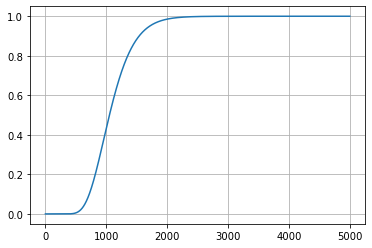

In [104]:
from scipy.stats import invgauss
#import scipy.integrate as integrate
import matplotlib.pyplot as plt
import numpy as np
import itertools

fig, ax = plt.subplots()
ax.grid(True)

# Initial Position in the mempool (in blocks)
y = 109.6

# Arrival rate of transactions with an high fee density
c = 0.9

# Diffusion correction (NOTE: the calculation of this value still has to be implemented, currently the example provided in the paper is used)
correction = 0.33 # c = 0.9 -> 0.33, c = 0.95 -> 0.35, c = 0.25 -> 0.5

mu = (y + correction) / (1 - c)
shape = (y + correction)**2

num_blocks_plot = 5000

x = np.linspace(0, num_blocks_plot, num=num_blocks_plot)

plt.plot(x, invgauss.cdf(x, mu/shape, scale=shape))
plt.show() 



# Survival Function and trend of zombie channels / locked funds over time

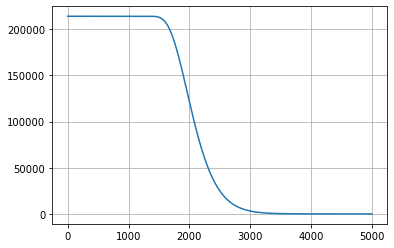

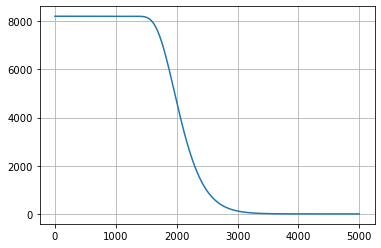

4678.935787157431  blocks until the number of zombie channels is less than 1
Median time to close channels:  2052.4104820964194


In [105]:
initial_num_zombie_channels = 428400 / 2 
initial_locked_BTC = 16422 / 2 

max_survival_time = None
median_time = None

def f(x, mu, shape, INIT_VALUE, check_max_survival_time, check_median_time):
    if x >= 0 and x <= 1000:
        return INIT_VALUE
    else:
        global max_survival_time
        global median_time
        
        sf = invgauss.sf
        sf_value = sf(x-1000, mu/shape, scale=shape)
        survivedProportion = sf_value * INIT_VALUE

        if check_max_survival_time and survivedProportion < 1 and max_survival_time is None:
            max_survival_time = x

        if check_median_time and sf_value <= 0.5 and median_time is None:
            median_time = x    
            
        return survivedProportion


# Plotting the number of zombie channels still to be closed, as a function of time
y = list(map(f, x, itertools.repeat(mu, len(x)), itertools.repeat(shape, len(x)), itertools.repeat(initial_num_zombie_channels, len(x)), itertools.repeat(True, len(x)), itertools.repeat(True, len(x)))) 

fig, ax = plt.subplots()
ax.grid(True)

plt.plot(x, y)
plt.show()

# Plotting the number of locked BTCs, as a function of time
y = list(map(f, x, itertools.repeat(mu, len(x)), itertools.repeat(shape, len(x)), itertools.repeat(initial_locked_BTC, len(x)),  itertools.repeat(False, len(x)), itertools.repeat(False, len(x))))

fig, ax = plt.subplots()
ax.grid(True)

plt.plot(x, y)
plt.show() 

print(max_survival_time, " blocks until the number of zombie channels is less than 1")
print("Median time to close channels: ", median_time)


# Time to close all channels as a function of LN size (with respect to current size)

Time to close all channels as a function of LN growth factor: 


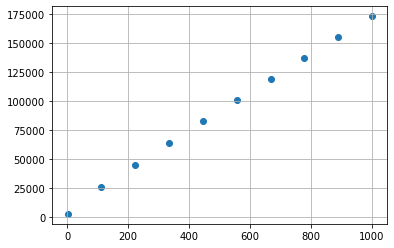

Median time to close channels as a function of LN growth factor: 


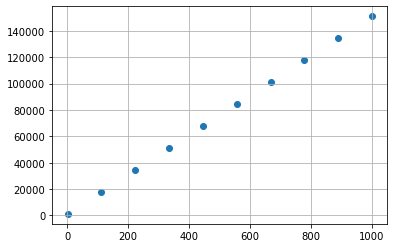

In [110]:
# Example: max survival time of channels with current LN size: 2610 blocks, median time to close channels: 1155 blocks

base_initial_num_zombie_channels = 60000 / 2
base_initial_locked_BTC = 2300 / 2

max_survival_time = None
median_time = None

max_survival_times = []
median_times = []

num_blocks_plot = 1500000

x = np.linspace(0, num_blocks_plot, num=100000)

factors = np.linspace(1, 1000, num=10)

for factor in factors:
    initial_num_zombie_channels = base_initial_num_zombie_channels * factor
    initial_locked_BTC = base_initial_locked_BTC * factor

    y = ((15000 + initial_num_zombie_channels) / 2 + initial_num_zombie_channels) / 3000 # 3000 is the num of tx in a block

    mu = (y + correction) / (1 - c)
    shape = (y + correction)**2
    
    for point in x:
        f(point, mu, shape, initial_num_zombie_channels, True, True)
    
    max_survival_times.append(max_survival_time)
    median_times.append(median_time)
    max_survival_time = None
    median_time = None

fig, ax = plt.subplots()
ax.grid(True)

print("Time to close all channels as a function of LN growth factor: ")

plt.scatter(factors, max_survival_times)
plt.show()

fig, ax = plt.subplots()
ax.grid(True)

print("Median time to close channels as a function of LN growth factor: ")

plt.scatter(factors, median_times)
plt.show() 


# Time to close all channels as a function of the fraction of the compromised LN max-cut (with a fixed LN size)

Time to close all channels as a function of the fraction of compromised max-cut: 


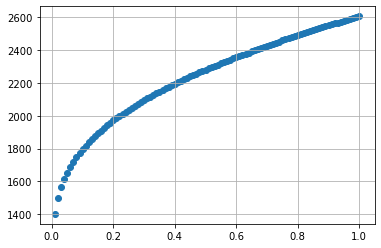

Median time to close channels as a function of the fraction of compromised max-cut: 


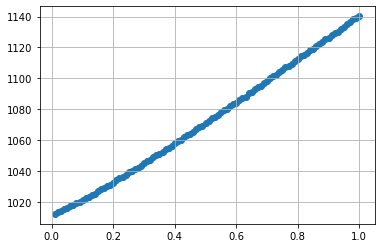

In [112]:
LN_factor = 1 # Factor of growth of LN with respect to the current LN size

base_initial_num_zombie_channels = (60000 / 2) * LN_factor
base_initial_locked_BTC = (2300 / 2) * LN_factor

max_survival_time = None
median_time = None

max_survival_times = []
median_times = []

num_blocks_plot = 5000

x = np.linspace(0, num_blocks_plot, num=5000)

fractions_of_max_cut = np.linspace(0.01, 1, num=100)

for fraction in fractions_of_max_cut:
    initial_num_zombie_channels = base_initial_num_zombie_channels * fraction
    initial_locked_BTC = base_initial_locked_BTC * fraction

    y = ((15000 + initial_num_zombie_channels) / 2 + initial_num_zombie_channels) / 3000 # 3000 is the num of tx in a block

    mu = (y + correction) / (1 - c)
    shape = (y + correction)**2
    
    for point in x:
        f(point, mu, shape, initial_num_zombie_channels, True, True)
    
    max_survival_times.append(max_survival_time)
    median_times.append(median_time)
    max_survival_time = None
    median_time = None

fig, ax = plt.subplots()
ax.grid(True)

print("Time to close all channels as a function of the fraction of compromised max-cut: ")

plt.scatter(fractions_of_max_cut, max_survival_times)
plt.show()

fig, ax = plt.subplots()
ax.grid(True)

print("Median time to close channels as a function of the fraction of compromised max-cut: ")

plt.scatter(fractions_of_max_cut, median_times)
plt.show() 

In [108]:
# TODO: Implement model of another paper, that uses Queuing theory (https://www.aimsciences.org/article/doi/10.3934/jimo.2018193, https://www.aimsciences.org/article/doi/10.3934/jimo.2018047)

# def integrand(x):
#     mu = 3
#     hazard = (mu * np.exp(-mu*x)) / (1- (1 - np.exp(-mu*x)))
    
    

# def expected_time_second_paper(_lambda, b, E_s, E_s_square, mu):
#     a = 1 / (2 * (_lambda ** 2) * (b - (_lambda * E_s)))
#     c = -_lambda * ((b * (b-1)() - ((_lambda ** 2) * E_s_square)))

#     b = 0

#     for k in range(1, b+1):
#         alpha = integrate.quad(integrand, 0, np.inf)


